In [ ]:
# Bibliotecas Usadas
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import LabelBinarizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , roc_auc_score
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import seaborn as sn
import matplotlib as mpl


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Lendo o Data Frame e analisando
df = pd.read_csv('/content/drive/MyDrive/IA-Relatorio/diamonds.csv',sep=',')
display(df)

In [ ]:
# Criando um novo Data Frame aparti do df.
# Nesse novo data frame estamos excluindo a coluna Unnamed: 0
# E organizando as colunas para a cut ficar como ultima
df_e = (df[['carat','color','clarity','depth','table','price','x','y','z','cut']])

In [ ]:
# Analisando os valores unicos da coluna cut
df_e.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
contagem = df_e['cut'].value_counts()

# Imprimir a contagem
print(contagem)

Ideal        3137
Premium      2524
Very Good    2522
Good         1313
Fair          504
Name: cut, dtype: int64


In [ ]:
# Analisando os valores unicos da coluna color e da clarity
print(df_e.color.unique())
print(df_e.clarity.unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [ ]:
# Criando um dicionario  
# Para realizar a troca de valores da coluna color e clarity
t = {'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0}
c = {'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}

In [ ]:
# Trocando os valores da coluna color e clarity com o metodo reclace do pandas
df_e = df_e.replace(t)
df_e = df_e.replace(c)

In [ ]:
# Visualizando o data frame para ver se os valores foram trocados
df_e

,carat,color,clarity,depth,table,price,x,y,z,cut
0,0.23,5,1,61.5,55.0,326,3.95,3.98,2.43,Ideal
1,0.21,5,2,59.8,61.0,326,3.89,3.84,2.31,Premium
2,0.23,5,4,56.9,65.0,327,4.05,4.07,2.31,Good
3,0.29,1,3,62.4,58.0,334,4.20,4.23,2.63,Premium
4,0.31,0,1,63.3,58.0,335,4.34,4.35,2.75,Good
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,6,2,60.8,57.0,2757,5.75,5.76,3.50,Ideal
53936,0.72,6,2,63.1,55.0,2757,5.69,5.75,3.61,Good
53937,0.70,6,2,62.8,60.0,2757,5.66,5.68,3.56,Very Good
53938,0.86,2,1,61.0,58.0,2757,6.15,6.12,3.74,Premium


In [ ]:
df_e = df_e.head(10000)

In [ ]:
df_e

,carat,color,clarity,depth,table,price,x,y,z,cut
0,0.23,5,1,61.5,55.0,326,3.95,3.98,2.43,Ideal
1,0.21,5,2,59.8,61.0,326,3.89,3.84,2.31,Premium
2,0.23,5,4,56.9,65.0,327,4.05,4.07,2.31,Good
3,0.29,1,3,62.4,58.0,334,4.20,4.23,2.63,Premium
4,0.31,0,1,63.3,58.0,335,4.34,4.35,2.75,Good
...,...,...,...,...,...,...,...,...,...,...
9995,1.00,5,1,63.5,56.0,4704,6.38,6.31,4.03,Very Good
9996,1.00,5,1,61.4,61.0,4704,6.41,6.36,3.92,Premium
9997,1.00,5,1,61.1,58.0,4704,6.48,6.44,3.95,Premium
9998,1.00,6,2,62.0,58.0,4704,6.41,6.29,3.94,Premium


In [ ]:
# Seperando as características
x = df_e.values[:,0:9]
y = df_e.values[:,9]

In [ ]:
# Confirindo se todos os valores de são numeros
x = x.astype('float32')
x

array([[0.23, 5.  , 1.  , ..., 3.95, 3.98, 2.43],
       [0.21, 5.  , 2.  , ..., 3.89, 3.84, 2.31],
       [0.23, 5.  , 4.  , ..., 4.05, 4.07, 2.31],
       ...,
       [1.  , 5.  , 1.  , ..., 6.48, 6.44, 3.95],
       [1.  , 6.  , 2.  , ..., 6.41, 6.29, 3.94],
       [1.  , 6.  , 2.  , ..., 6.2 , 6.13, 4.  ]], dtype=float32)

In [ ]:
# Conferindo se o y recebeu somente as respostas  da coluna cut
y

array(['Ideal', 'Premium', 'Good', ..., 'Premium', 'Premium', 'Fair'],
      dtype=object)

In [ ]:
# Transformando os valores de y
# Para arrays binarios 
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
Y2 = np_utils.to_categorical(encoded_y)
Y2

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# Utilizando o metodo minmax para normalizar os dados de x
scaler = MinMaxScaler()
x = df_e.values[:,0:9] 
x = scaler.fit_transform(x)
print(x)

[[0.01948052 0.83333333 0.14285714 ... 0.04177546 0.05989583 0.49897331]
 [0.00649351 0.83333333 0.28571429 ... 0.02610966 0.0234375  0.47433265]
 [0.01948052 0.83333333 0.57142857 ... 0.06788512 0.08333333 0.47433265]
 ...
 [0.51948052 0.83333333 0.14285714 ... 0.70234987 0.70052083 0.8110883 ]
 [0.51948052 1.         0.28571429 ... 0.68407311 0.66145833 0.80903491]
 [0.51948052 1.         0.28571429 ... 0.62924282 0.61979167 0.82135524]]


In [ ]:
# Separando os valores de x e y
# Sendo 80% para treino (xtrain, ytrain)
# E 20% para teste (xtest, ytest)
xtrain, xtest, ytrain, ytest = train_test_split(x,Y2,test_size=0.20)

In [ ]:
unique_combinations = np.array(list(set(map(tuple, Y2))))

print(unique_combinations)

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
xtest

array([[0.07792208, 0.83333333, 0.28571429, ..., 0.1462141 , 0.1640625 ,
        0.56673511],
       [0.52597403, 0.5       , 0.28571429, ..., 0.65796345, 0.67447917,
        0.78439425],
       [0.33766234, 0.83333333, 0.28571429, ..., 0.49086162, 0.51041667,
        0.73921971],
       ...,
       [0.51948052, 0.66666667, 0.28571429, ..., 0.72062663, 0.71614583,
        0.79055441],
       [0.45454545, 0.66666667, 0.28571429, ..., 0.60052219, 0.61979167,
        0.80082136],
       [0.36363636, 0.33333333, 1.        , ..., 0.52480418, 0.54166667,
        0.74743326]])

In [ ]:
#rede neural
model = Sequential()
model.add(Dense(10,activation='relu',kernel_initializer='he_normal',input_shape=(9,)))
# Camada oculta da RNA
model.add(Dense(15, activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))
# Camda de saida da RNA
model.add(Dense(5,activation='softmax'))

In [ ]:
#compilacao do modelo
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(xtrain,ytrain, validation_data=(xtest,ytest),epochs=200,batch_size=32,verbose=1)

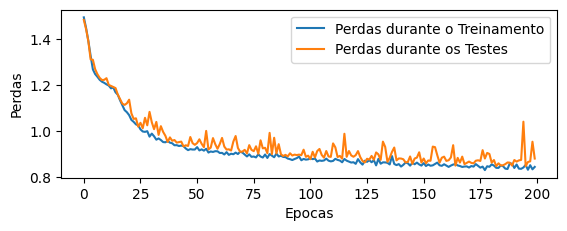

In [ ]:
# Plotando o grafico 
plt.title=('Grafico de custo') # Erros
plt.subplot(211)
plt.plot(history.history['loss'], label='Perdas durante o Treinamento')
plt.plot(history.history['val_loss'], label='Perdas durante os Testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend()
plt.show()

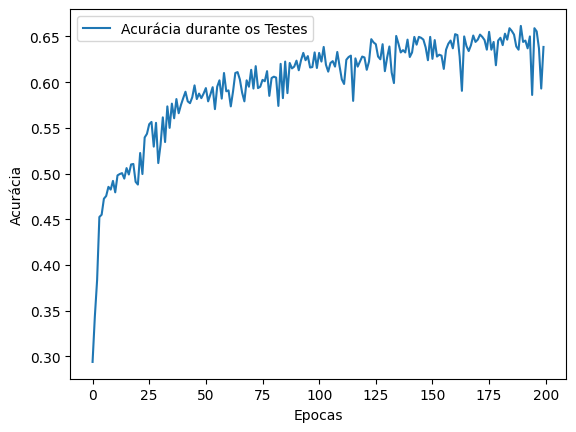

In [ ]:
# Plotando o Grafi
# plt.title('Grafico de Desempenho') # Erros
plt.plot(history.history['val_accuracy'], label='Acurácia durante os Testes')
plt.xlabel('Epocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

In [ ]:
# predict probabilities for test set
previsto = model.predict(xtest, verbose=0)

In [ ]:
xtest


array([[0.07792208, 0.83333333, 0.28571429, ..., 0.1462141 , 0.1640625 ,
        0.56673511],
       [0.52597403, 0.5       , 0.28571429, ..., 0.65796345, 0.67447917,
        0.78439425],
       [0.33766234, 0.83333333, 0.28571429, ..., 0.49086162, 0.51041667,
        0.73921971],
       ...,
       [0.51948052, 0.66666667, 0.28571429, ..., 0.72062663, 0.71614583,
        0.79055441],
       [0.45454545, 0.66666667, 0.28571429, ..., 0.60052219, 0.61979167,
        0.80082136],
       [0.36363636, 0.33333333, 1.        , ..., 0.52480418, 0.54166667,
        0.74743326]])

In [ ]:
# Analisando o array gerado 
display(previsto)

array([[7.88586494e-03, 5.47266960e-01, 9.25729889e-03, 5.15680108e-03,
        4.30433065e-01],
       [1.00474935e-02, 2.51645029e-01, 3.35173495e-02, 1.87758625e-01,
        5.17031550e-01],
       [7.58416019e-03, 3.84415507e-01, 2.06119437e-02, 3.08311563e-02,
        5.56557238e-01],
       ...,
       [2.80758855e-03, 4.62391861e-02, 4.33339179e-02, 5.99811375e-01,
        3.07807922e-01],
       [2.85269637e-02, 8.28912020e-01, 2.50433781e-03, 1.39641706e-04,
        1.39916942e-01],
       [9.03640102e-06, 7.46356882e-03, 7.44078457e-01, 8.86287540e-02,
        1.59820139e-01]], dtype=float32)

In [ ]:
# Gerando a matrix de confusão 
print(confusion_matrix(ytest.argmax(axis=1), previsto.argmax(axis=1)))

[[ 92   5   3   1   2]
 [ 33 159   2  35  48]
 [  0   0 515  41  32]
 [  0   0  56 383  85]
 [  3  84  98 195 128]]


In [ ]:
# Pegando o resultado da matrix da confusão e salvando em uma varriavel 
matrix = confusion_matrix(ytest.argmax(axis=1), previsto.argmax(axis=1))

In [ ]:
# Criando o um data frame  com o resultado da matrix de confusão
df_mat = pd.DataFrame(matrix, index=['Ideal', 'Premium', 'Good', 'Very_Good','Fair'], columns=['Ideal', 'Premium', 'Good', 'Very_Good','Fair'])
# Criando uma nova coluna com os valores totais 
df_mat = df_mat.eval('Tt_Amostras = Ideal+Premium+Good+Very_Good+Fair')

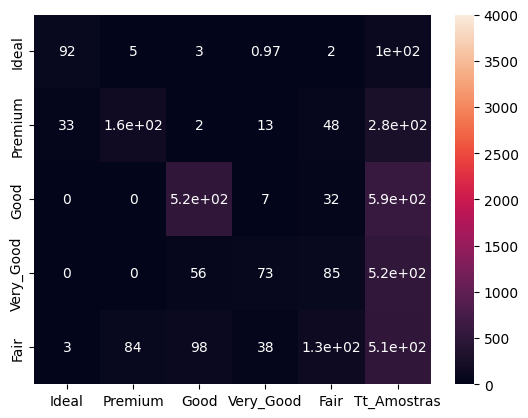

In [ ]:
# Gerando a matrix de confusão 
conf_arr = df_mat.values[:,0:5]
sum = conf_arr.sum()
df_cm = df_mat[['Ideal', 'Premium', 'Good', 'Very_Good','Fair','Tt_Amostras']]
cmap = plt.cm.RdYlBu
res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=4000.0)
plt.yticks([0.5,1.5,2.5,3.5,4.5], ['Ideal', 'Premium', 'Good', 'Very_Good','Fair'],va='center')
plt.show(cmap)

In [ ]:
# Salvando a matrix de confusão  em outro data frame
df_matrix = df_mat

In [ ]:
# Pegando o data frame que foi gerado pela matrix
# Aqui estmos pegando a porcentagem de acertos de cada item
df_matrix['Very_Good'] = round(df_matrix['Very_Good']*100 / df_matrix['Tt_Amostras'],2)
df_matrix

,Ideal,Premium,Good,Very_Good,Fair,Tt_Amostras
Ideal,92,5,3,0.97,2,103
Premium,33,159,2,12.64,48,277
Good,0,0,515,6.97,32,588
Very_Good,0,0,56,73.09,85,524
Fair,3,84,98,38.39,128,508


TypeError: ignored

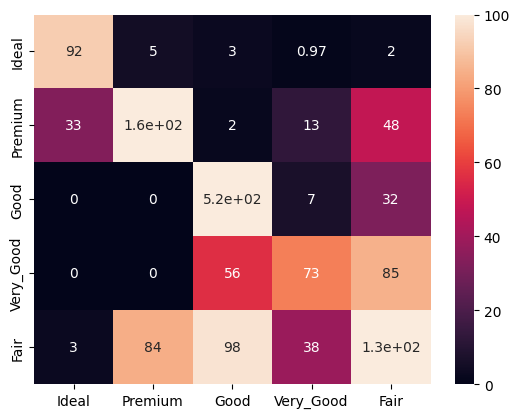

In [ ]:
# Gerando a matrix de confusão em porcentagem
conf_arr = df_matrix.values[:,0:4]
sum = conf_arr.sum()
df_cm = df_matrix[['Ideal', 'Premium', 'Good', 'Very_Good','Fair']]
cmap = plt.cm.RdYlBu
res = sn.heatmap(df_cm, annot=True,vmin=0.0, vmax=100.0)
plt.yticks([0.5,1.5,2.5,3.5,4.5], ['Ideal', 'Premium', 'Good', 'Very_Good','Fair'],va='center')
plt.title('Matriz de Confusão em %')
plt.show(cmap)

In [ ]:
previsto = previsto.round()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(ytest, previsto, average='samples', zero_division=1)
recall = recall_score(ytest, previsto, average='samples', zero_division=1)
f1 = f1_score(ytest, previsto, average='samples', zero_division=1)

In [ ]:
# print("Valores reais: ", ytest)
# print("Valores previsto pela RNA: ", previsto)

print('|------------------|')
print('|Accuracy: {:.2f}    |'.format(accuracy_score(ytest, previsto)))
print('|------------------|')
print('|Precision: {:.2f}   |'.format(precision_score(ytest, previsto, average='micro')))
print('|------------------|')
print('|Recall: {:.2f}      |'.format(recall_score(ytest, previsto, average='micro')))
print('|------------------|')
print('|F1-score: {:.2f}    |'.format(f1_score(ytest, previsto, average='micro')))
print('|------------------|')
#relatório com métricas de testes do modelo
from sklearn.metrics import classification_report
print('\nRelatório de classificação\n')
print(classification_report(ytest, previsto, target_names=['Ideal', 'Premium', 'Good','Very','Fair']))